<a href="https://colab.research.google.com/github/Liron-hag/Data_analysis_proj/blob/AUC_0.868/ProjData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, KFold
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from typing import List, Dict
%matplotlib inline

In [115]:
# load
data = pd.read_csv("train.csv")
#Converting data to numpy arrays
X, y = data.values[:,:-1], data.values[:, -1]
print(f'X.shape: {X.shape}, y.shape: {y.shape}')

#split to train and test
X_train_raw ,X_val_raw ,y_train, y_val = train_test_split(X,y,test_size = 0.2, random_state= 42, shuffle=True)
print(f'X_train_raw.shape: {X_train_raw.shape}, y_train.shape: {y_train.shape}, \
X_validation_raw.shape: {X_val_raw.shape}, y_validation.shape: {y_val.shape}')


X.shape: (55462, 16), y.shape: (55462,)
X_train_raw.shape: (44369, 16), y_train.shape: (44369,), X_validation_raw.shape: (11093, 16), y_validation.shape: (11093,)


In [116]:
data

,ID,worked_in_the_past,age_group,disability,is_dev,education,sex,mental_issues,years_of_experience,A,B,C,D,country,prev_salary,stack_experience,label
0,65168,T,young,No,developer,NaN,Male,No,13.0,-1.093080,1.0,aa,180.984266,NaN,67104.0,Bash/Shell;Java;JavaScript;PowerShell;Python;T...,1
1,38314,T,young,No,non-developer,other,Male,Yes,7.0,5.444533,7.0,rhz,180.677533,United States of America,101000.0,Bash/Shell;JavaScript;PowerShell;Python;Docker...,0
2,5209,T,old,No,developer,other,Male,Yes,25.0,1.727255,15.0,aa,177.746162,United States of America,70000.0,Bash/Shell;HTML/CSS;Java;JavaScript;PHP;SQL;Gi...,0
3,54165,T,young,NaN,developer,other,Male,No,10.0,17.804302,7.0,aa,176.952584,Spain,40956.0,C#;Dart;Delphi;Kotlin;SQL;VBA;Docker;Unity 3D;...,0
4,42213,T,young,No,developer,BA/BSc,Male,No,12.0,-8.679091,4.0,hr,179.393259,Canada,101509.0,Assembly;Bash/Shell;C++;PowerShell;Python;Rust,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55457,64649,T,young,No,developer,BA/BSc,Male,No,7.0,6.868416,2.0,aa,NaN,United States of America,80000.0,NaN,1
55458,57832,T,NaN,NaN,developer,MA/MSc,Male,No,22.0,2.030205,20.0,ca,178.055004,Brazil,149568.0,Bash/Shell;C++;Java;JavaScript;PHP;SQL;Docker;...,1
55459,47358,T,old,No,developer,BA/BSc,Male,No,35.0,1.473015,35.0,aa,182.771752,United States of America,NaN,Bash/Shell;HTML/CSS;JavaScript;Python;SQL;Type...,1
55460,36055,T,young,NaN,developer,BA/BSc,Male,No,6.0,-0.883305,3.0,ww,180.147589,United States of America,105000.0,C;HTML/CSS;Java;JavaScript;Node.js;TypeScript;...,1


Nan fill options:

work in past - if years of experiance not 0 so True. Else if prev salary not Nan so True.

age - need to find the years of experiance that 50% are young and 50% old. than each one that his expirience is higher is old.

disability - we can save on the proportion that we already have.

is_dev - we can check if dev salary is higher then other.

aducation, sex, mental issues - save the proportion

years of expirience - oposite of age. we can include salary site too.

A,B,D - save on median

C - save on proportion

cuntry - save on proportion

salary - combination of age, years of experiance and dev




In [117]:
# prompt: how many Nan in every col?

nan_counts = data.isna().sum(axis=0)
print(nan_counts)


ID                         0
worked_in_the_past      1765
age_group               2540
disability              3681
is_dev                  2090
education               3016
sex                     3228
mental_issues           2415
years_of_experience     2564
A                       2135
B                       3535
C                       3002
D                       2619
country                 2019
prev_salary             2664
stack_experience       14042
label                      0
dtype: int64


# Category data to Binary or numeric data
The logic we decided to use with categorial data is to replace it by number for each category.
For Example - age - old = 1, young = 0

In [118]:
# prompt: replace in col "age group" - old to 1 and young to 0, remove Nan

def replace_age_to_binary(data):
  data['age_group'].replace(['old','young'],[1,0],inplace=True)
  return data

# T = 1, F = 0
def replace_worked_in_past_to_binary(data):
  data['worked_in_the_past'].replace(['T','F'],[1,0],inplace=True)
  return data

# Yes = 1, No = 0
def replace_diability_to_binary(data):
  data['disability'].replace(['Yes','No'],[1,0],inplace=True)
  return data

# developer = 1, non-developer = 0
def replace_is_dev_to_binary(data):
  data['is_dev'].replace(['developer','non-developer'],[1,0],inplace=True)
  return data

# Male = 1, Female = 0
def replace_sex_to_binary(data):
  data['sex'].replace(['Other','Male','Female'],[2,1,0],inplace=True)
  return data

# education: MA/MSc = 1, BA/BSc = 2, Phd = 3, other = 4, High school = 5
def replace_education_to_binary(data):
  data['education'].replace(['MA/MSc','BA/BSc','Phd','other','High school'],[1,2,3,4,5],inplace=True)
  return data

# Yes = 1, No = 0
def replace_mental_to_binary(data):
  data['mental_issues'].replace(['Yes','No'],[1,0],inplace=True)
  return data

def replace_C_to_numeric(data):
  data['C'].replace(['aa','ww','br','mn','rhz','ca','hr'],[1,2,3,4,5,6,7],inplace=True)
  return data

# just fot first test
def replace_country_to_numeric(data):
  country_mapping = {c: i for i, c in enumerate(data['country'].unique())}
  data['country'] = data['country'].map(country_mapping)
  return data

def replace_category_to_binary(data):
  data = replace_age_to_binary(data)
  data = replace_worked_in_past_to_binary(data)
  data = replace_diability_to_binary(data)
  data = replace_is_dev_to_binary(data)
  data = replace_sex_to_binary(data)
  data = replace_education_to_binary(data)
  data = replace_mental_to_binary(data)
  data = replace_C_to_numeric(data)
  data = replace_country_to_numeric(data)
  return data

#def string_to_int(data):
#  data = data['A'].astype(int)
#  data = data['D'].astype(int)
#  return data

# count how many strings that split by ; there are in a cell on col 'stack_experience'

def count_strings_in_cell(cell):
  cell = str(cell)
  return len(cell.split(';'))

def replace_to_numeric(data):
  data['stack_experience'] = data['stack_experience'].apply(count_strings_in_cell)
  data = replace_category_to_binary(data)

replace_to_numeric(data)
data

,ID,worked_in_the_past,age_group,disability,is_dev,education,sex,mental_issues,years_of_experience,A,B,C,D,country,prev_salary,stack_experience,label
0,65168,1.0,0.0,0.0,1.0,NaN,1.0,0.0,13.0,-1.093080,1.0,1.0,180.984266,0,67104.0,12,1
1,38314,1.0,0.0,0.0,0.0,4.0,1.0,1.0,7.0,5.444533,7.0,5.0,180.677533,1,101000.0,7,0
2,5209,1.0,1.0,0.0,1.0,4.0,1.0,1.0,25.0,1.727255,15.0,1.0,177.746162,1,70000.0,12,0
3,54165,1.0,0.0,NaN,1.0,4.0,1.0,0.0,10.0,17.804302,7.0,1.0,176.952584,2,40956.0,17,0
4,42213,1.0,0.0,0.0,1.0,2.0,1.0,0.0,12.0,-8.679091,4.0,7.0,179.393259,3,101509.0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55457,64649,1.0,0.0,0.0,1.0,2.0,1.0,0.0,7.0,6.868416,2.0,1.0,NaN,1,80000.0,1,1
55458,57832,1.0,NaN,NaN,1.0,1.0,1.0,0.0,22.0,2.030205,20.0,6.0,178.055004,8,149568.0,25,1
55459,47358,1.0,1.0,0.0,1.0,2.0,1.0,0.0,35.0,1.473015,35.0,1.0,182.771752,1,NaN,21,1
55460,36055,1.0,0.0,NaN,1.0,2.0,1.0,0.0,6.0,-0.883305,3.0,2.0,180.147589,1,105000.0,14,1


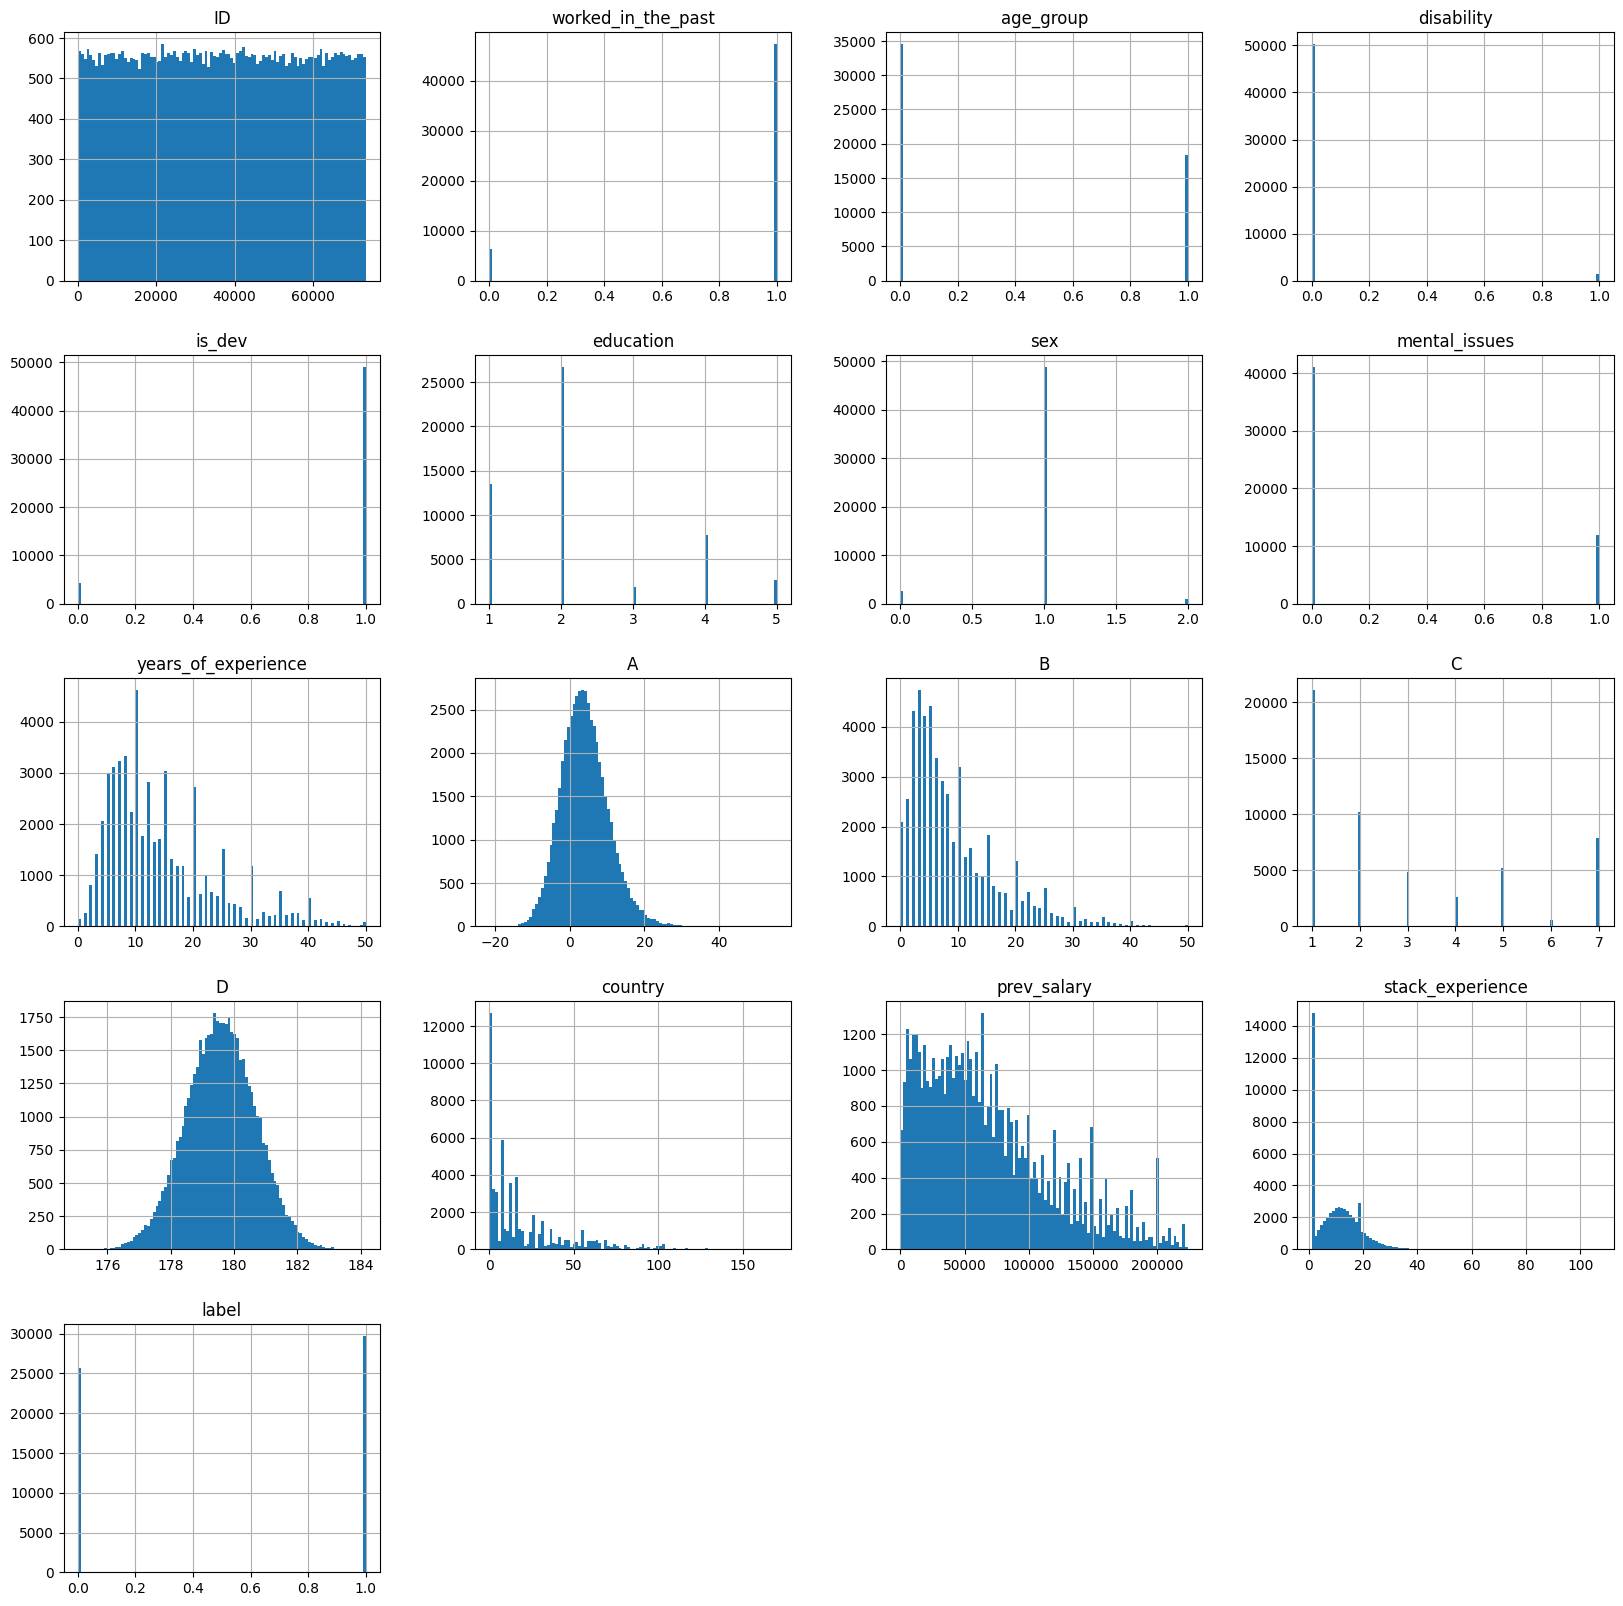

In [119]:
# prompt: how every col distrabution?

data.hist(bins = 100, figsize = (20,20))
plt.show()

# Simple Nan filling
There are many Null data so on this section we fulfill our assomption data according logical corelation inside the column (mean) and corelation outside the column (year_of_experience and age, someone with 30 years of experience probably should be on old category)

In [120]:
# prompt: I need to fulfill all the null in prev salary col by the meidian
def fill_Null(data):
  #data["worked_in_the_past"] = data["worked_in_the_past"].fillna(0)
  for index, row in data.iterrows():
    if pd.isna(row['worked_in_the_past']):
      if row['years_of_experience'] == 0:
        data.at[index, 'worked_in_the_past'] = 0
      else:
        data.at[index, 'worked_in_the_past'] = 1

  #data["age_group"] = data["age_group"].fillna(0)
  data['age_group'] = np.where((data['age_group'].isna()) & (data['years_of_experience'] > 15), 1,
                               np.where(data['age_group'].isna(), 0, data['age_group']))

  data["disability"] = data["disability"].fillna(0)

  data["is_dev"] = data["is_dev"].fillna(0)

  data["education"] = data["education"].fillna(1)

  data["sex"] = data["sex"].fillna(0)

  data["mental_issues"] = data["mental_issues"].fillna(0)

  data["years_of_experience"] = data["years_of_experience"].fillna(data["years_of_experience"].median())

  data["A"] = data["A"].fillna(data["A"].median())

  data["B"] = data["B"].fillna(data["B"].median())

  data["C"] = data["C"].fillna('aa')

  data["D"] = data["D"].fillna(data["D"].median())

  data["country"] = data["country"].fillna('Israel')

  data["prev_salary"] = data["prev_salary"].fillna(data["prev_salary"].median())

  data["stack_experience"] = data["stack_experience"].fillna(data["stack_experience"].median())

fill_Null(data)
nan_counts = data.isna().sum(axis=0)
print(nan_counts)


ID                     0
worked_in_the_past     0
age_group              0
disability             0
is_dev                 0
education              0
sex                    0
mental_issues          0
years_of_experience    0
A                      0
B                      0
C                      0
D                      0
country                0
prev_salary            0
stack_experience       0
label                  0
dtype: int64


Change the Nan values to Numeric

In [121]:
replace_category_to_binary(data)
data

,ID,worked_in_the_past,age_group,disability,is_dev,education,sex,mental_issues,years_of_experience,A,B,C,D,country,prev_salary,stack_experience,label
0,65168,1.0,0.0,0.0,1.0,1.0,1.0,0.0,13.0,-1.093080,1.0,1.0,180.984266,0,67104.0,12,1
1,38314,1.0,0.0,0.0,0.0,4.0,1.0,1.0,7.0,5.444533,7.0,5.0,180.677533,1,101000.0,7,0
2,5209,1.0,1.0,0.0,1.0,4.0,1.0,1.0,25.0,1.727255,15.0,1.0,177.746162,1,70000.0,12,0
3,54165,1.0,0.0,0.0,1.0,4.0,1.0,0.0,10.0,17.804302,7.0,1.0,176.952584,2,40956.0,17,0
4,42213,1.0,0.0,0.0,1.0,2.0,1.0,0.0,12.0,-8.679091,4.0,7.0,179.393259,3,101509.0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55457,64649,1.0,0.0,0.0,1.0,2.0,1.0,0.0,7.0,6.868416,2.0,1.0,179.584091,1,80000.0,1,1
55458,57832,1.0,1.0,0.0,1.0,1.0,1.0,0.0,22.0,2.030205,20.0,6.0,178.055004,8,149568.0,25,1
55459,47358,1.0,1.0,0.0,1.0,2.0,1.0,0.0,35.0,1.473015,35.0,1.0,182.771752,1,57660.0,21,1
55460,36055,1.0,0.0,0.0,1.0,2.0,1.0,0.0,6.0,-0.883305,3.0,2.0,180.147589,1,105000.0,14,1


# Outliers
On that section we remove some Outliers

In [122]:
# prompt: remove outliers from past_salary columns

# Removing outliers from 'prev_salary' column
#Q1_salary = data['prev_salary'].quantile(0.25)
#Q3_salary = data['prev_salary'].quantile(0.75)
#IQR_salary = Q3_salary - Q1_salary
#lower_bound_salary = Q1_salary - 1.5 * IQR_salary
#upper_bound_salary = Q3_salary + 1.5 * IQR_salary
#data = data[(data['prev_salary'] >= lower_bound_salary) & (data['prev_salary'] <= upper_bound_salary)]

# unfurtunatly this Outlier remover dosent help so we drop it.

# Correletion Matrix

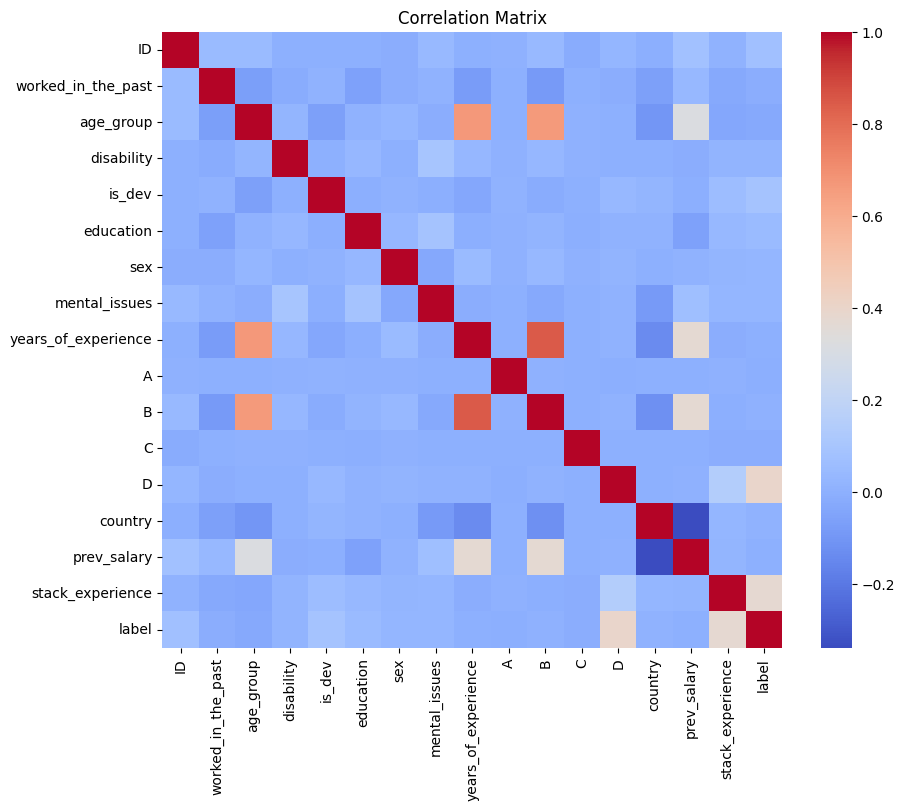

In [123]:
import seaborn as sns  # Import seaborn correctly
import matplotlib.pyplot as plt

# Calculate correlation matrix
correlation_matrix = data.corr()

# Visualize as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')

plt.show()

# Standartization between 0 to 1
Here we normalised some of the columns that needed it. colums that are discrete save as it is beacuse there is no meaning to normalies it, but the other we changed.
That standartization will able to the model compre the wight of each feture much better.
Compering between salary chage of 100 in prev_salary is not equall to 100 on years of experience.

In [124]:
# prompt: make a standartization function for each col

def standardize_column(data, column_name):
  """
  Standardize a column in a DataFrame by subtracting the mean and dividing by the standard deviation.

  Args:
    data: The DataFrame containing the column.
    column_name: The name of the column to standardize.

  Returns:
    The DataFrame with the standardized column.
  """

  # Calculate the mean and standard deviation of the column.
  mean = data[column_name].mean()
  std = data[column_name].std()

  # Standardize the column.
  data[column_name] = (data[column_name] - mean) / std

  return data

def standardize_data(data):
  data = standardize_column(data, 'prev_salary')
  data = standardize_column(data, 'years_of_experience')
  data = standardize_column(data, 'stack_experience')
  data = standardize_column(data, 'A')
  data = standardize_column(data, 'B')
  data = standardize_column(data, 'D')

standardize_data(data)
data

,ID,worked_in_the_past,age_group,disability,is_dev,education,sex,mental_issues,years_of_experience,A,B,C,D,country,prev_salary,stack_experience,label
0,65168,1.0,0.0,0.0,1.0,1.0,1.0,0.0,-0.121134,-0.810672,-1.028808,1.0,1.314260,0,-0.004316,0.208709,1
1,38314,1.0,0.0,0.0,0.0,4.0,1.0,1.0,-0.774464,0.232254,-0.252062,5.0,1.027090,1,0.695623,-0.404403,0
2,5209,1.0,1.0,0.0,1.0,4.0,1.0,1.0,1.185528,-0.360752,0.783599,1.0,-1.717323,1,0.055485,0.208709,0
3,54165,1.0,0.0,0.0,1.0,4.0,1.0,0.0,-0.447799,2.203970,-0.252062,1.0,-2.460288,2,-0.544262,0.821821,0
4,42213,1.0,0.0,0.0,1.0,2.0,1.0,0.0,-0.230022,-2.020845,-0.640435,7.0,-0.175275,3,0.706134,-0.527025,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55457,64649,1.0,0.0,0.0,1.0,2.0,1.0,0.0,-0.774464,0.459402,-0.899350,1.0,0.003385,1,0.261981,-1.140137,1
55458,57832,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.858862,-0.312424,1.430887,6.0,-1.428178,8,1.698533,1.802800,1
55459,47358,1.0,1.0,0.0,1.0,2.0,1.0,0.0,2.274412,-0.401310,3.372751,1.0,2.987743,1,-0.199331,1.312310,1
55460,36055,1.0,0.0,0.0,1.0,2.0,1.0,0.0,-0.883353,-0.777207,-0.769893,2.0,0.530945,1,0.778222,0.453954,1


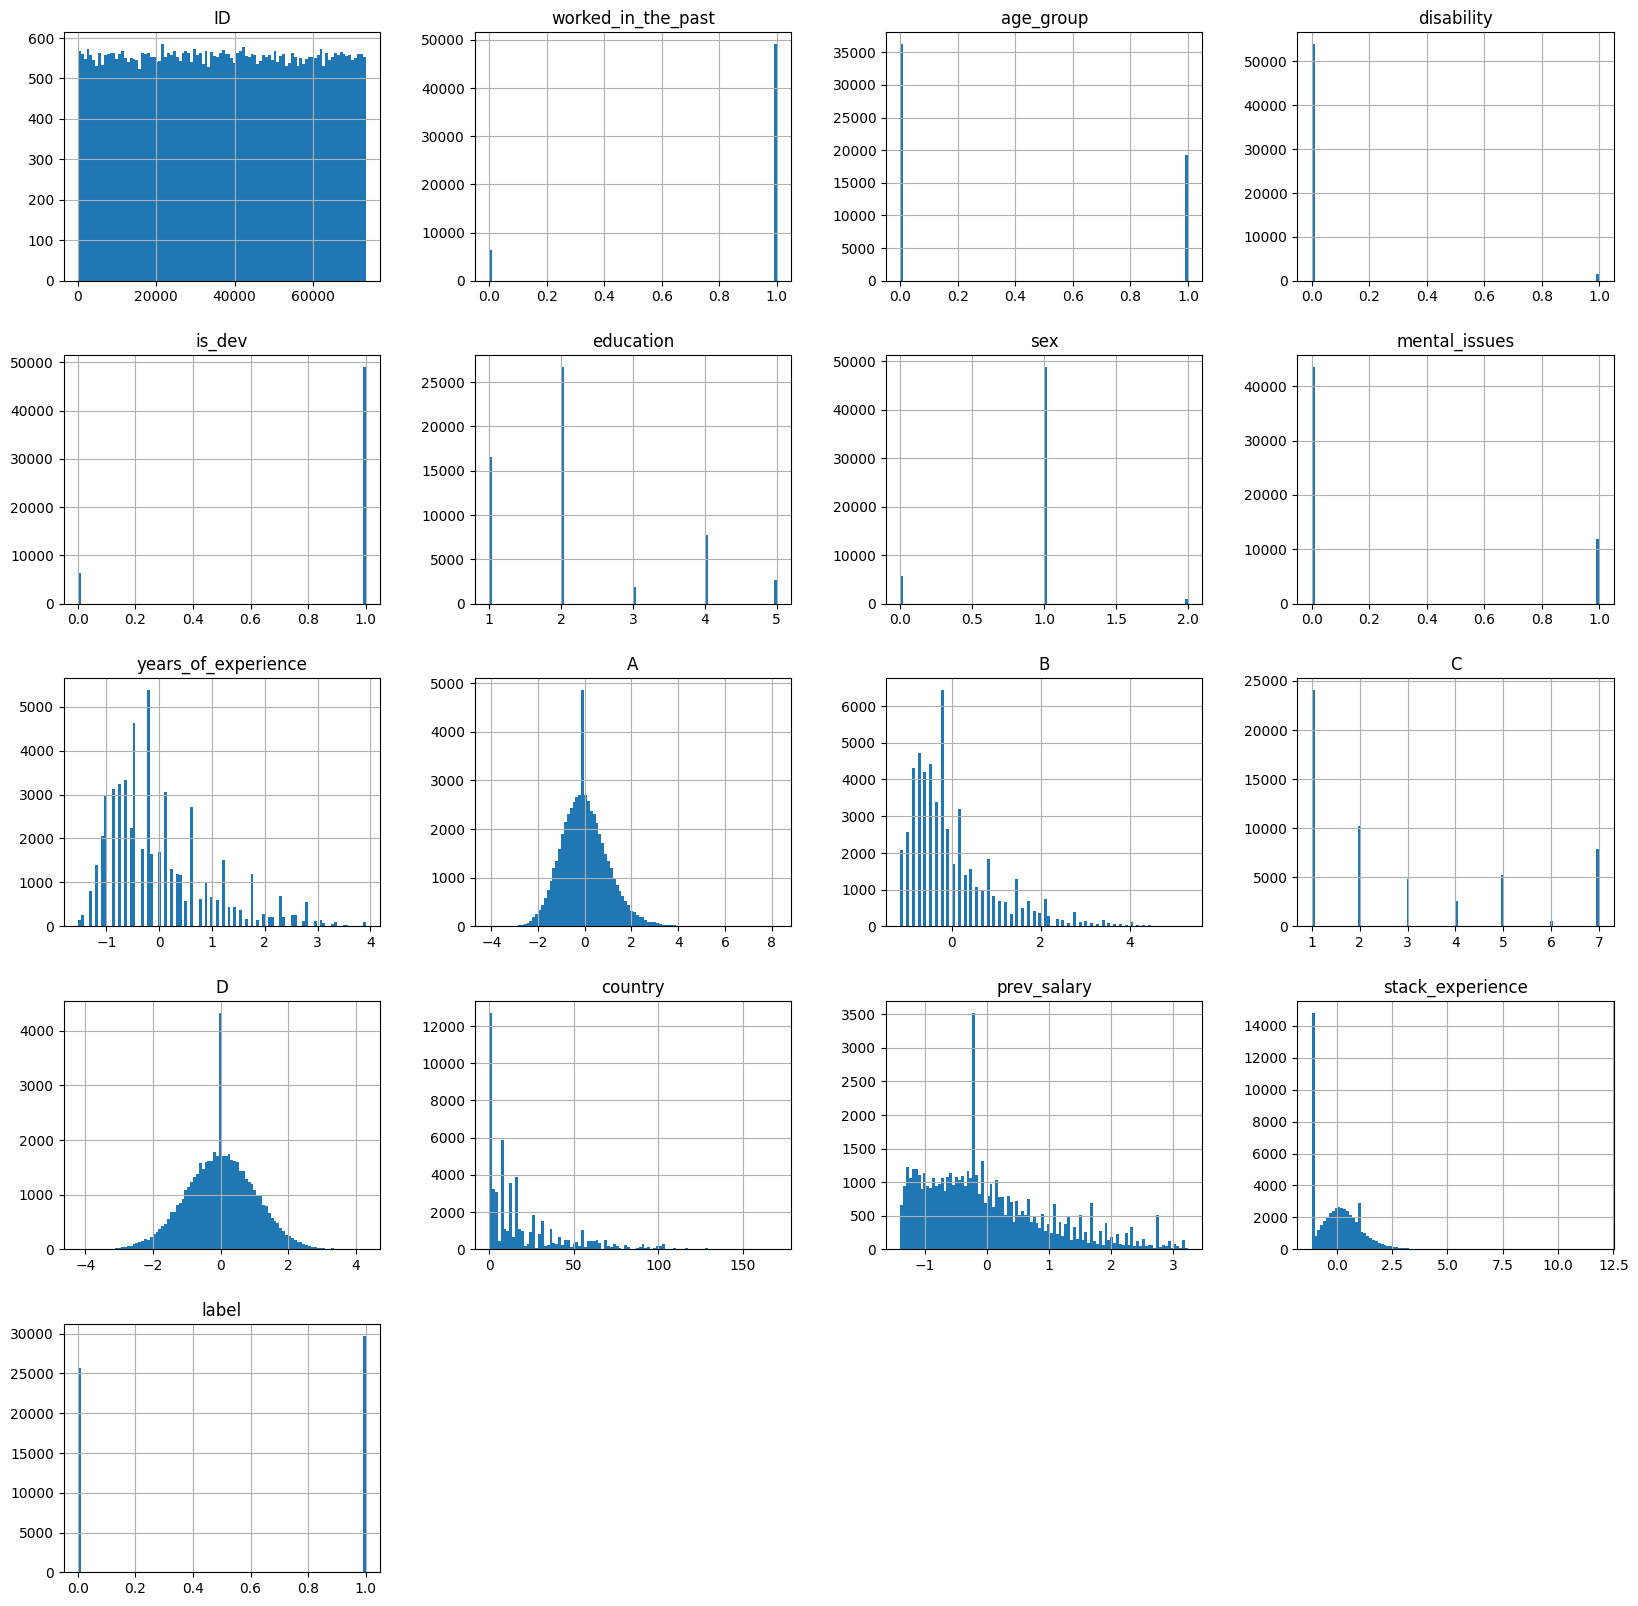

In [125]:
data.hist(bins = 100, figsize = (20,20))
plt.show()

# Dimantion problem
In that case we have only 17 features so its we try to drop as less features as we can.
high dimantion problem could be beacuse many dimantion increase the varaity and it may lead to overfitting and bad reasolts on test. we will recognise high dimantion problen when we will se that the train score decrease but test score will increase.

When we lower the dimantion the variety decresed but the score decrease too. when we decreased the dimantion we use less data and that decrease the moudle score.
In addition, on PCA we got features that were better than out featurs but we couldent explain what they tell on the person and why he got/not the job.

In [126]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

#pca = PCA(n_components=2)
#temp_data = data[['prev_salary','years_of_experience','stack_experience','A','B','C','D']]
#temp_data
#pca.fit(temp_data)
#PCA_featur = pca.components_

In [127]:

#data['PCA1'] = PCA_featur[0][0] * data['prev_salary'] + PCA_featur[0][1] * data['years_of_experience'] + PCA_featur[0][2] * data['stack_experience'] + PCA_featur[0][3] * data['A'] + PCA_featur[0][4] * data['B'] + PCA_featur[0][5] * data['C'] + PCA_featur[0][6] * data['D']
#data['PCA2'] = PCA_featur[1][0] * data['prev_salary'] + PCA_featur[1][1] * data['years_of_experience'] + PCA_featur[1][2] * data['stack_experience'] + PCA_featur[1][3] * data['A'] + PCA_featur[1][4] * data['B'] + PCA_featur[1][5] * data['C'] + PCA_featur[1][6] * data['D']
#data = data.drop(['prev_salary','years_of_experience','stack_experience','A','B','C','D'], axis=1)
#data


In [128]:
# prompt: swich the place of PCA2 and lable

# Assuming 'label' is the name of the column containing labels
#temp_col = data['PCA2'].copy()
#data['PCA2'] = data['label']
#data['label'] = temp_col
#data


# Test Prepretion
Here we will prepare the tset data before moudle implimentation

In [129]:
# load
#test_data = pd.read_csv("test.csv")

#fill_Null(test_data)
#replace_to_numeric(test_data)
#standardize_data(test_data)
#test

Model building

In [130]:
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay, RocCurveDisplay
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Logistic Regression

In [131]:
clf = LogisticRegression()
param_grid = {
    'penalty': ['l1','l2'],
    'C': [0.1,1,10],
    'solver': ['saga']
}
optimizer = GridSearchCV(clf, param_grid,scoring='roc_auc',n_jobs=4)

# data = data[['ID','worked_in_the_past','age_group','disability','education','is_dev','sex','mental_issues','prev_salary','years_of_experience','stack_experience','A','B','C','D','label']]

data

,ID,worked_in_the_past,age_group,disability,is_dev,education,sex,mental_issues,years_of_experience,A,B,C,D,country,prev_salary,stack_experience,label
0,65168,1.0,0.0,0.0,1.0,1.0,1.0,0.0,-0.121134,-0.810672,-1.028808,1.0,1.314260,0,-0.004316,0.208709,1
1,38314,1.0,0.0,0.0,0.0,4.0,1.0,1.0,-0.774464,0.232254,-0.252062,5.0,1.027090,1,0.695623,-0.404403,0
2,5209,1.0,1.0,0.0,1.0,4.0,1.0,1.0,1.185528,-0.360752,0.783599,1.0,-1.717323,1,0.055485,0.208709,0
3,54165,1.0,0.0,0.0,1.0,4.0,1.0,0.0,-0.447799,2.203970,-0.252062,1.0,-2.460288,2,-0.544262,0.821821,0
4,42213,1.0,0.0,0.0,1.0,2.0,1.0,0.0,-0.230022,-2.020845,-0.640435,7.0,-0.175275,3,0.706134,-0.527025,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55457,64649,1.0,0.0,0.0,1.0,2.0,1.0,0.0,-0.774464,0.459402,-0.899350,1.0,0.003385,1,0.261981,-1.140137,1
55458,57832,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.858862,-0.312424,1.430887,6.0,-1.428178,8,1.698533,1.802800,1
55459,47358,1.0,1.0,0.0,1.0,2.0,1.0,0.0,2.274412,-0.401310,3.372751,1.0,2.987743,1,-0.199331,1.312310,1
55460,36055,1.0,0.0,0.0,1.0,2.0,1.0,0.0,-0.883353,-0.777207,-0.769893,2.0,0.530945,1,0.778222,0.453954,1


In [132]:
#Converting data to numpy arrays
X, y = data.values[:,:-1], data.values[:, -1]
print(f'X.shape: {X.shape}, y.shape: {y.shape}')

#split to train and test
X_train ,X_val ,y_train, y_val = train_test_split(X,y,test_size = 0.2, random_state= 42, shuffle=True)
print(f'X_train.shape: {X_train.shape}, y_train.shape: {y_train.shape}, \
X_validation.shape: {X_val.shape}, y_validation.shape: {y_val.shape}')



X.shape: (55462, 16), y.shape: (55462,)
X_train.shape: (44369, 16), y_train.shape: (44369,), X_validation.shape: (11093, 16), y_validation.shape: (11093,)


In [133]:
#optimizer.fit(X_train,y_train)
#RocCurveDisplay.from_estimator(optimizer, X_val, y_val)

# KNN Regressor

In [134]:
from sklearn.neighbors import KNeighborsRegressor
clf_knn = KNeighborsRegressor(n_neighbors=100)
clf_knn.fit(X_train, y_train)
print("Sklearn KNN auc:", clf_knn.score(X_val, y_val))


Sklearn KNN auc: -0.0024803597363809438



# Random Forest

In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from scipy import stats
from sklearn.tree import plot_tree

Sklearn Random Forest auc: 0.7715676552781033


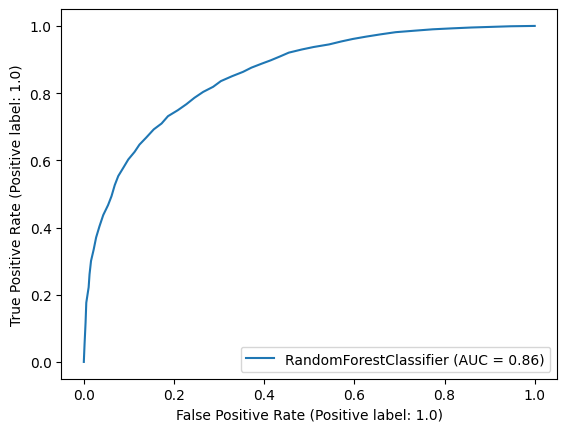

In [143]:
rf = RandomForestClassifier(n_estimators=50, random_state=0, criterion='entropy')
rf.fit(X_train, y_train)
print("Sklearn Random Forest auc:", rf.score(X_val, y_val))
RocCurveDisplay.from_estimator(rf, X_val, y_val)

Sklearn Random Forest auc: 0.7718380960966376


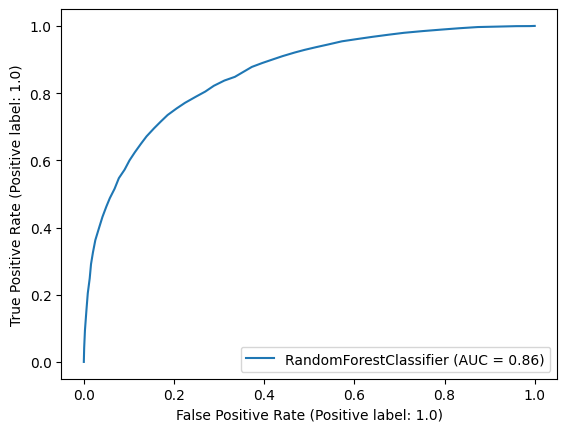

In [137]:
rf1 = RandomForestClassifier(n_estimators=50, random_state=0, criterion='gini')
rf1.fit(X_train, y_train)
print("Sklearn Random Forest auc:", rf1.score(X_val, y_val))
RocCurveDisplay.from_estimator(rf1, X_val, y_val)

# AdaBoost

Sklearn AdaBoost auc: 0.7801316145316867


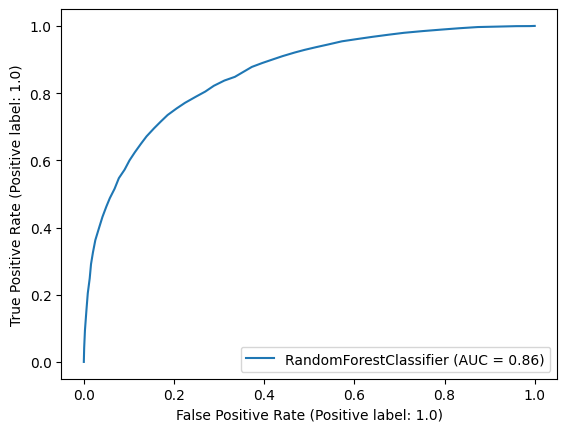

In [138]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

clf_ada = AdaBoostClassifier(n_estimators=100, random_state=0)
clf_ada.fit(X_train, y_train)
print("Sklearn AdaBoost auc:", clf_ada.score(X_val, y_val))
RocCurveDisplay.from_estimator(rf1, X_val, y_val)

# Confusion Matrix
The results show that 3798 people that the moudle predict that they will not be approve actually didn't been approved, while 4856 people that the moudle predict that they will be approve actually been approved.
On the other hand, 1335 that the moudle perdict that will be approve dosent approve and 1104 that the moudle predict that won't be approved actually been approved.

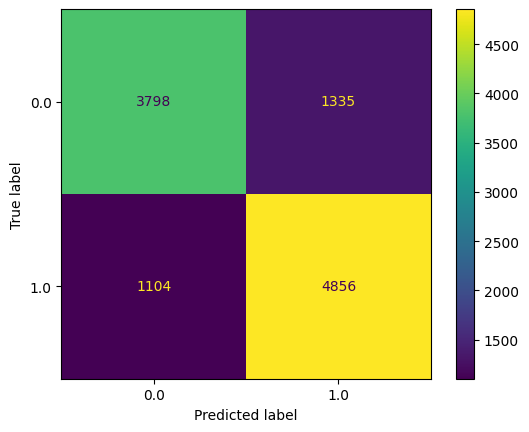

In [139]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

y_pred = clf_ada.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_ada.classes_)
disp.plot()
plt.show()


# K-Fold Cross Validation

# Train vs Validation

In [140]:
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

# prompt: compere the train preformence to validation in each modle , show it in a plot

# Prepare models
models = [
    ('Logistic Regression', LogisticRegression()),
    ('KNN', KNeighborsRegressor(n_neighbors=100)),
    ('Random Forest (Entropy)', RandomForestClassifier(n_estimators=60, random_state=0, criterion='entropy')),
    ('Random Forest (Gini)', RandomForestClassifier(n_estimators=50, random_state=0, criterion='gini')),
    ('AdaBoost', AdaBoostClassifier(n_estimators=100, random_state=0))
]

# Perform K-Fold Cross Validation and store results
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    cv_results_train = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    cv_results_val = cross_val_score(model, X_val, y_val, cv=kfold, scoring=scoring)
    results.append([cv_results_train, cv_results_val])
    names.append(name)
    msg_train = "%s: train_accuracy: %f (std: %f)" % (name, cv_results_train.mean(), cv_results_train.std())
    msg_val = "%s: val_accuracy: %f (std: %f)" % (name, cv_results_val.mean(), cv_results_val.std())
    print(msg_train)
    print(msg_val)

# Plot results
fig = plt.figure(figsize=(10, 6))
fig.suptitle('Algorithm Comparison (Train vs Validation)')
ax = fig.add_subplot(111)
plt.boxplot([result[0] for result in results], positions=np.arange(len(results))-0.1, widths=0.2)
plt.boxplot([result[1] for result in results], positions=np.arange(len(results))+0.1, widths=0.2)
ax.set_xticklabels(names)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


Logistic Regression: train_accuracy: 0.535960 (std: 0.008228)
Logistic Regression: val_accuracy: 0.537275 (std: 0.015713)
KNN: train_accuracy: nan (std: nan)
KNN: val_accuracy: nan (std: nan)


KeyboardInterrupt: 

In [144]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, ensemble
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import tree

In [147]:
#set the hyper parameters
params = {'n_estimators': 500, 'max_depth': 3, 'min_samples_split': 5, 'learning_rate': 0.01, 'loss': 'squared_error'}

# Create the GBM regressor object
regr = ensemble.GradientBoostingRegressor(**params)

# Train the model using the training sets
regr.fit(X_train, y_train)

test_score = np.zeros((params['n_estimators'],), dtype=np.float64)



AttributeError: 'GradientBoostingRegressor' object has no attribute 'loss_'

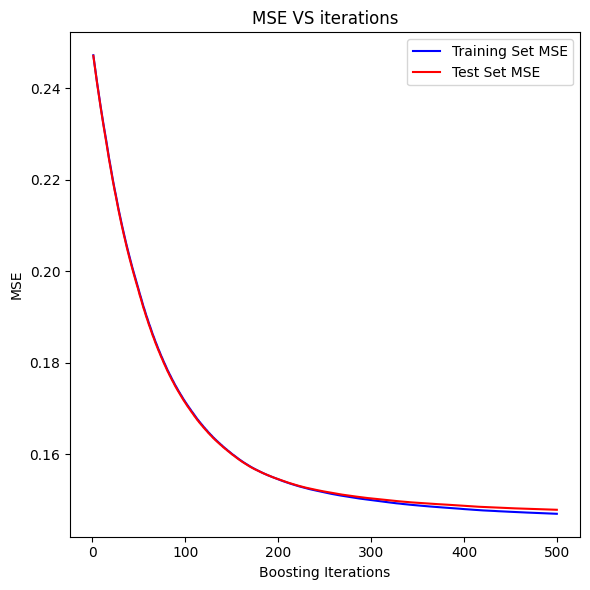

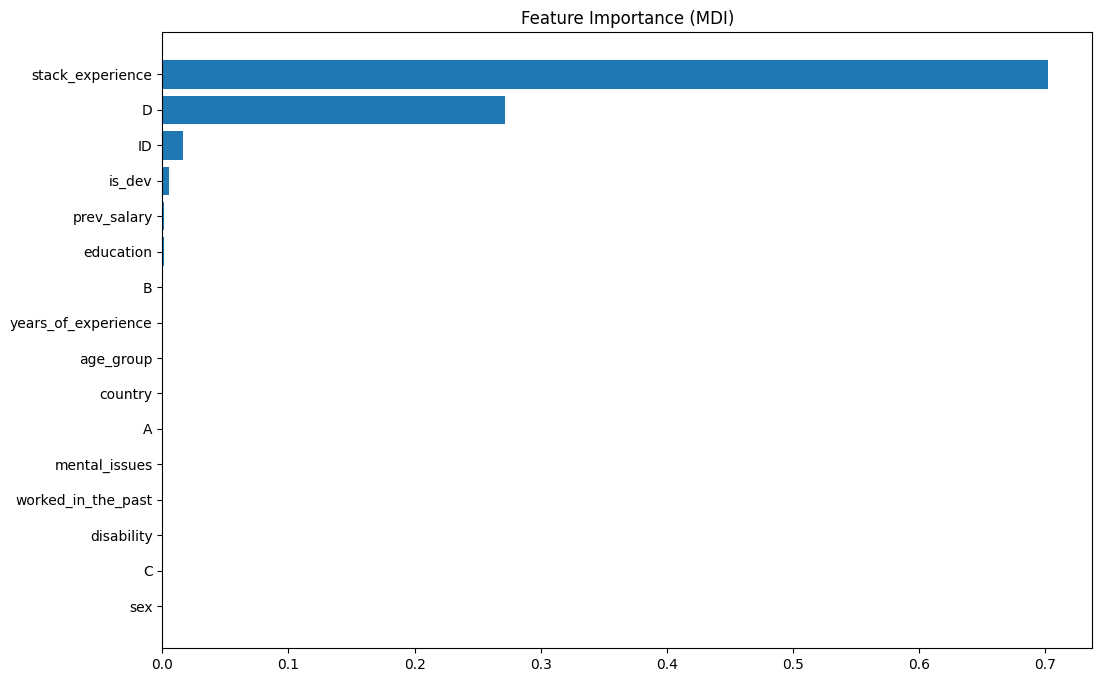

In [150]:
#Using the special "staged_predict" method to get the (aggregated) predictions after each step
for i, y_pred in enumerate(regr.staged_predict(X_val)):
    test_score[i] = mean_squared_error(y_val, y_pred)

    #create plot
fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('MSE VS iterations')
plt.plot(np.arange(params['n_estimators']) + 1, regr.train_score_, 'b-', label='Training Set MSE')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-', label='Test Set MSE')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('MSE')
fig.tight_layout()
plt.show()

# get the feature importance array from the model object attribute
feature_importance = regr.feature_importances_

# get the index order to sort the importances
sorted_idx = np.argsort(feature_importance)

# plot
pos = np.arange(sorted_idx.shape[0]) + .5
plt.rcParams["figure.figsize"] = (12,8)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(data.columns)[sorted_idx])
plt.title('Feature Importance (MDI)')
plt.show()

In [151]:
# prompt: calculat AUC of that gradientboosting

from sklearn.metrics import roc_auc_score

# Predict probabilities for the positive class
y_pred_proba = regr.predict(X_val)

# Calculate AUC
auc_score = roc_auc_score(y_val, y_pred_proba)
print("AUC:", auc_score)


AUC: 0.8683312968984738
